In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

# 10.4 Lab 1: Principal Components Analysis

> states=row.names(USArrests )

> states

In [3]:
USArrests = pd.read_csv('Data/USArrests.csv', na_values='?').dropna()

In [4]:
USArrests['State'].values

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

> names(USArrests )

In [5]:
USArrests.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

> apply(USArrests , 2, mean)

In [6]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

> apply(USArrests , 2, var)

In [7]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

> pr.out=prcomp(USArrests , scale=TRUE)

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler(with_mean = False) #PCA自带with_mean功能
std_scaler.fit(USArrests.iloc[:,1:])
X_Standard = std_scaler.transform(USArrests.iloc[:,1:])
pca = PCA()
pca.fit(X_Standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

> names(pr.out)

> pr.out$center

> pr.out$scale

以上代码无法直接查询但可以通过以下代码来近似理解

In [9]:
pca.mean_ *(std_scaler.var_**0.5)

array([  7.788, 170.76 ,  65.54 ,  21.232])

In [10]:
std_scaler.var_**0.5

array([ 4.31173469, 82.50007515, 14.3292847 ,  9.27224762])

> pr.out$rotation

In [11]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [12]:
vectors_pca = pd.DataFrame(pca.components_.T,columns = ['PC1','PC2','PC3','PC4'],index = USArrests.columns[1:]).round(3)
vectors_pca

,PC1,PC2,PC3,PC4
Murder,0.536,0.418,-0.341,0.649
Assault,0.583,0.188,-0.268,-0.743
UrbanPop,0.278,-0.873,-0.378,0.134
Rape,0.543,-0.167,0.818,0.089


> dim(pr.out$x)

In [13]:
pca.transform(X_Standard).shape

(50, 4)

> biplot(pr.out, scale=0)

In [14]:
USArrests_pca = pd.DataFrame(pca.transform(X_Standard),columns = ['PC1','PC2','PC3','PC4'],index = USArrests.State)
USArrests_pca.head()

,PC1,PC2,PC3,PC4
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


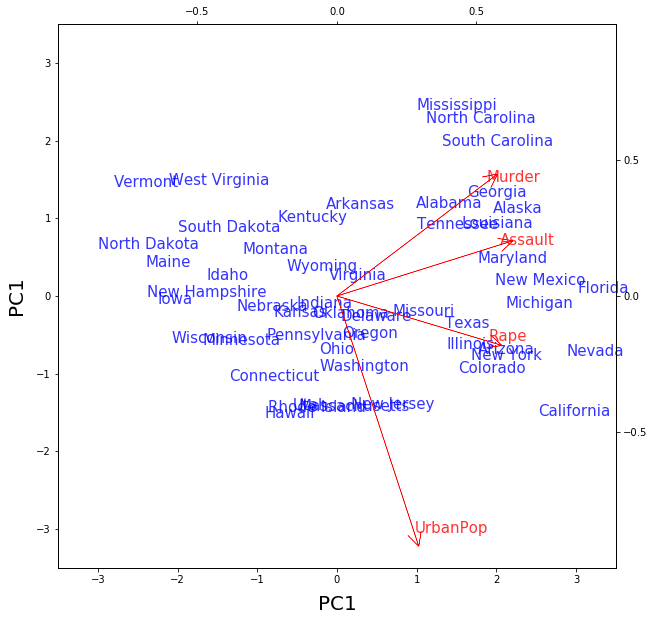

In [15]:
plt.figure(figsize=(10, 10))
host = plt.subplot(111)
host.set_xlim(-3.5,3.5)
host.set_ylim(-3.5,3.5)
host.set_xlabel('PC1',fontsize=20,labelpad=10)
host.set_ylabel('PC1',fontsize=20,labelpad=10)
for state in USArrests.State:
    #如果需要有指向性箭头使用plt.annotate
    #plt.annotate(state,(USArrests_pca['PC1'][state], USArrests_pca['PC2'][state]),alpha = 0.8,color = 'blue')
    host.text(USArrests_pca['PC1'][state],USArrests_pca['PC2'][state],state,alpha = 0.8,color = 'blue', fontsize=15)
par = host.twinx().twiny()
par.set_xlim(-1,1)
par.set_ylim(-1,1)
par.set_xticks([-0.5,0,0.5])
par.set_yticks([-0.5,0,0.5])
for variable in vectors_pca.index:
    par.text(vectors_pca['PC1'][variable],vectors_pca['PC2'][variable],variable,alpha = 0.8,color = 'red', fontsize=15)
    par.arrow(0, 0, vectors_pca['PC1'][variable], vectors_pca['PC2'][variable], color='red',
              linewidth = 0.5,head_width=0.05,head_length=0.05,overhang = 1)
plt.show()

> pr.out$rotation=-pr.out$rotation

> pr.out$x=-pr.out$x

> biplot(pr.out, scale=0)

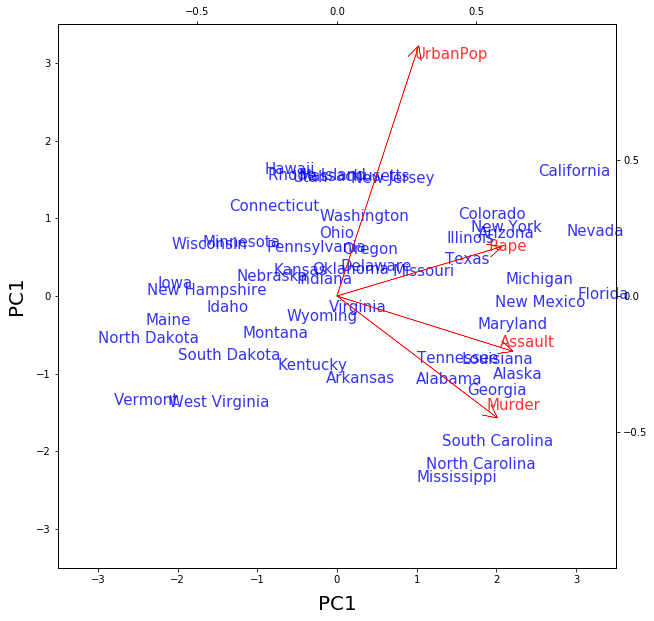

In [16]:
plt.figure(figsize=(10, 10))
host = plt.subplot(111)
host.set_xlim(-3.5,3.5)
host.set_ylim(-3.5,3.5)
host.set_xlabel('PC1',fontsize=20,labelpad=10)
host.set_ylabel('PC1',fontsize=20,labelpad=10)
for state in USArrests.State:
    #如果需要有指向性箭头使用plt.annotate
    #plt.annotate(state,(USArrests_pca['PC1'][state], USArrests_pca['PC2'][state]),alpha = 0.8,color = 'blue')
    host.text(USArrests_pca['PC1'][state],-USArrests_pca['PC2'][state],state,alpha = 0.8,color = 'blue', fontsize=15)
par = host.twinx().twiny()
par.set_xlim(-1,1)
par.set_ylim(-1,1)
par.set_xticks([-0.5,0,0.5])
par.set_yticks([-0.5,0,0.5])
for variable in vectors_pca.index:
    par.text(vectors_pca['PC1'][variable],-vectors_pca['PC2'][variable],variable,alpha = 0.8,color = 'red', fontsize=15)
    par.arrow(0, 0, vectors_pca['PC1'][variable], -vectors_pca['PC2'][variable], color='red',
              linewidth = 0.5,head_width=0.05,head_length=0.05,overhang = 1)
plt.show()

> pr.out$sdev

In [17]:
#这里和R语言结果稍微有点差别，每个值有点比例上的区别
pca.explained_variance_ ** 0.5

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

> pr.var=pr.out$sdev ^2

> pr.var

In [18]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

> pve=pr.var/sum(pr.var)

> pve

In [19]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [20]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [21]:
X_Standard.var(axis = 0).sum()

4.0

> plot(pve, xlab="Principal Component ", ylab="Proportion of
Variance Explained ", ylim=c(0,1),type=’b’)


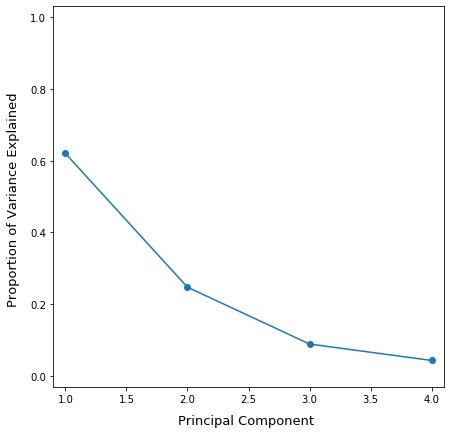

In [22]:
plt.figure(figsize=(7, 7))
plt.plot([1,2,3,4],pca.explained_variance_ratio_,'o-')
plt.xlim(0.9,4.1)
plt.ylim(-0.03,1.03)
plt.yticks(np.linspace(0,1,6))
plt.xlabel("Principal Component " ,fontsize=13,labelpad=10)
plt.ylabel("Proportion of Variance Explained " ,fontsize=13,labelpad=10)
plt.show()


> plot(cumsum(pve), xlab="Principal Component ", ylab="
Cumulative Proportion of Variance Explained ", ylim=c(0,1),
type=’b’)

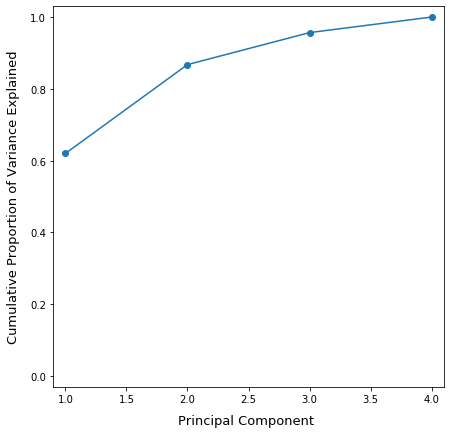

In [23]:
plt.figure(figsize=(7, 7))
plt.plot([1,2,3,4],pca.explained_variance_ratio_.cumsum(),'o-')
plt.xlim(0.9,4.1)
plt.ylim(-0.03,1.03)
plt.yticks(np.linspace(0,1,6))
plt.xlabel("Principal Component " ,fontsize=13,labelpad=10)
plt.ylabel("Cumulative Proportion of Variance Explained" ,fontsize=13,labelpad=10)
plt.show()

> a=c(1,2,8,-3)

> cumsum(a)

In [24]:
a = np.array([1,2,8,-3])
a.cumsum()

array([ 1,  3, 11,  8], dtype=int32)

# 10.5 Lab 2: Clustering

**10.5.1 K-Means Clustering**

> set.seed(2)

> x=matrix(rnorm(50*2), ncol=2)

> x[1:25,1]=x[1:25,1]+3

> x[1:25,2]=x[1:25,2]-4

In [25]:
np.random.seed(2)
X = np.random.normal(0,1,(50,2)) 
X[:25,0] = X[:25,0] + 3
X[:25,1] = X[:25,1] - 4

> km.out=kmeans(x,2,nstart =20)

In [26]:
from sklearn.cluster import KMeans
km_out = KMeans(n_clusters=2, n_init=20)
km_out.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

> km.out$cluster

In [27]:
km_out.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

> plot(x, col=(km.out$cluster +1), main="K-Means Clustering
Results with K=2", xlab="", ylab="", pch=20, cex=2)

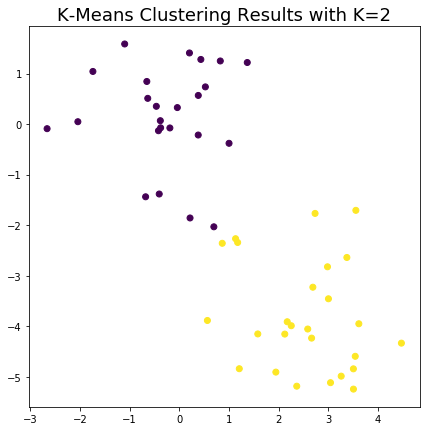

In [28]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:,0],X[:,1],c = km_out.labels_)
plt.title("K-Means Clustering Results with K=2",fontsize=18)
plt.show()

> set.seed(4)

> km.out=kmeans(x,3,nstart =20)

> km.out

In [29]:
km_out =  KMeans(n_clusters=3, n_init=20)
km_out.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
#K-means clustering with 3 clusters of sizes
from collections import Counter
Counter(km_out.labels_)

Counter({0: 21, 2: 10, 1: 19})

In [31]:
np.bincount(km_out.labels_)

array([21, 19, 10], dtype=int64)

In [32]:
#Cluster means:
km_out.cluster_centers_

array([[ 2.82805911, -4.11351797],
       [-0.34608792,  0.5592591 ],
       [ 0.72954539, -1.97251836]])

In [33]:
#Clustering vector:
km_out.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2])

In [34]:
#Within cluster sum of squares by cluster:(这里能直接得出的值是tot.withinss)
km_out.inertia_

69.30698623331516

In [35]:
#计算withinss(和即为tot.withinss)
print(((X[km_out.labels_ == 0] - km_out.cluster_centers_[0])**2).sum())
print(((X[km_out.labels_ == 1] - km_out.cluster_centers_[1])**2).sum())
print(((X[km_out.labels_ == 2] - km_out.cluster_centers_[2])**2).sum())

29.501046810159224
24.530684829356137
15.275254593799815


In [36]:
#计算between_SS /  total_SS
total_ss = (X.var(axis = 0)*(len(X))).sum()
print('between_SS:',total_ss - km_out.inertia_)
print('total_SS:',total_ss)
print('between_SS/total_SS:',((total_ss - km_out.inertia_)/total_ss*100).round(2),'%')
print('between_SS/total_SS:{:.2%}'.format(((total_ss - km_out.inertia_)/total_ss)))

between_SS: 321.1444814137266
total_SS: 390.4514676470418
between_SS/total_SS: 82.25 %
between_SS/total_SS:82.25%


> plot(x, col=(km.out$cluster +1), main="K-Means Clustering
Results with K=3", xlab="", ylab="", pch=20, cex=2)

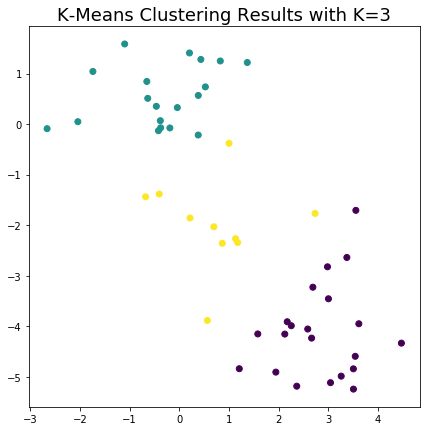

In [37]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:,0],X[:,1],c = km_out.labels_)
plt.title("K-Means Clustering Results with K=3",fontsize=18)
plt.show()

> set.seed(3)

> km.out=kmeans(x,3,nstart=1)

> km.out$tot.withinss

In [38]:
km_out =  KMeans(n_clusters=3, n_init=1)
km_out.fit(X)
km_out.inertia_

69.96606733283835

> km.out=kmeans(x,3,nstart =20)

> km.out$tot.withinss

In [39]:
km_out =  KMeans(n_clusters=3, n_init=20)
km_out.fit(X)
km_out.inertia_

68.97379200939726

**10.5.2 Hierarchical Clustering**

> hc.complete =hclust(dist(x), method="complete ")

> hc.average=hclust(dist(x), method="average ")

> hc.single=hclust(dist(x), method="single")


In [40]:
from scipy.cluster import hierarchy
hc_complete = hierarchy.complete(X)
hc_average = hierarchy.average(X)
hc_single = hierarchy.single(X)


> par(mfrow=c(1,3))

> plot(hc.complete ,main="Complete Linkage", xlab="", sub="",
cex=.9)

> plot(hc.average , main="Average Linkage", xlab="", sub="",
cex=.9)

> plot(hc.single , main="Single Linkage", xlab="", sub="",
cex=.9)

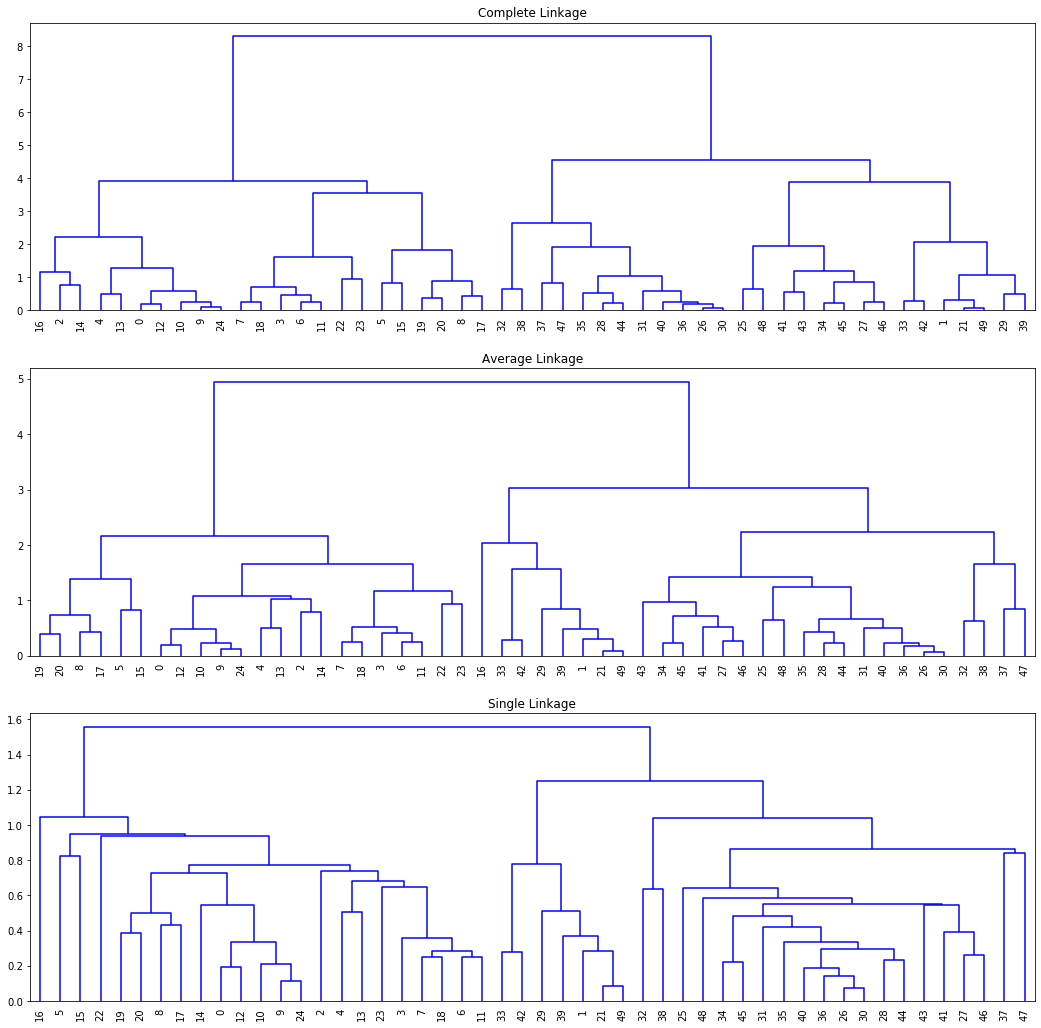

In [41]:
#参考https://github.com/JWarmenhoven/ISLR-python
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(18,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0,leaf_rotation=90.,leaf_font_size=10.)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

> cutree(hc.complete , 2)

> cutree(hc.average , 2)

> cutree(hc.single , 2)

In [42]:
hierarchy.cut_tree(hc_complete , 2).T

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

In [43]:
hierarchy.cut_tree(hc_average , 2).T

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

In [44]:
hierarchy.cut_tree(hc_single , 2).T

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

> cutree(hc.single , 4)

In [45]:
hierarchy.cut_tree(hc_single , 4).T

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
        0, 0, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3,
        3, 3, 3, 3, 3, 1]])

> xsc=scale(x)

In [46]:
from sklearn.preprocessing import scale
XSC = scale(X)

> plot(hclust(dist(xsc), method="complete "), main="Hierarchical
Clustering with Scaled Features ")

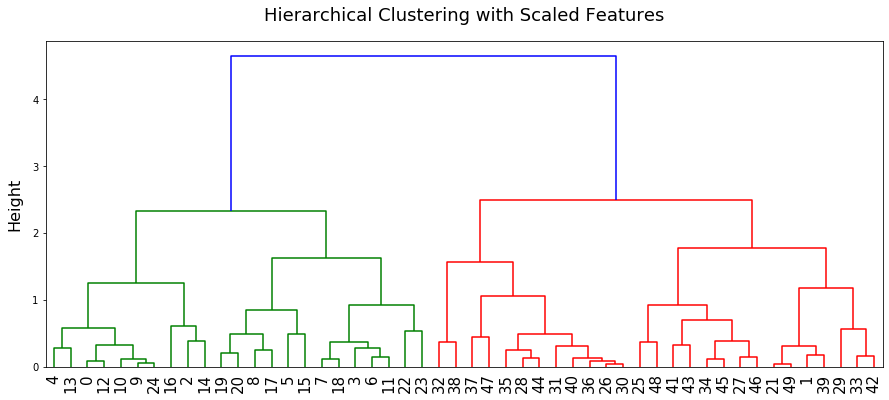

In [47]:
plt.figure(figsize=(15, 6))
plt.title("Hierarchical Clustering with Scaled Features", size=18,pad = 20)
plt.ylabel('Height',fontsize = 16,labelpad=10)
hierarchy.dendrogram(hierarchy.complete(XSC), leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

> x=matrix(rnorm(30*3), ncol=3)

> dd=as.dist(1-cor(t(x)))

> plot(hclust(dd, method="complete "), main="Complete Linkage
with Correlation -Based Distance ", xlab="", sub="")

In [48]:
X = np.random.normal(0,1,(30,3)) 

In [49]:
dd = np.corrcoef(X)

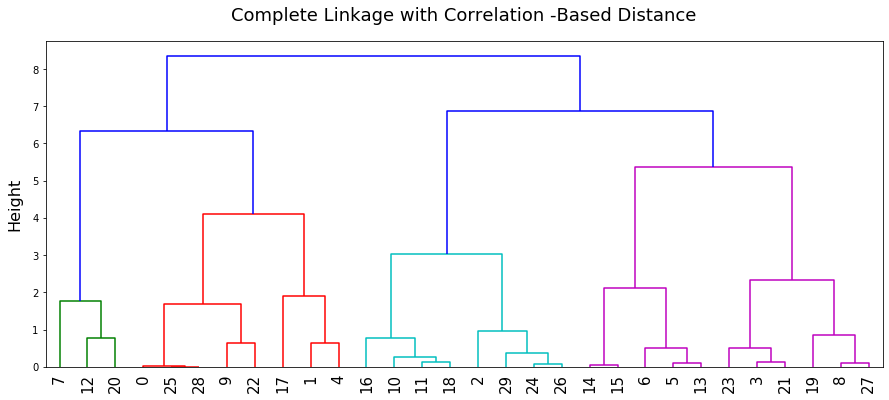

In [50]:
plt.figure(figsize=(15, 6))
plt.title("Complete Linkage with Correlation -Based Distance", size=18,pad = 20)
plt.ylabel('Height',fontsize = 16,labelpad=10)
hierarchy.dendrogram(hierarchy.complete(dd), leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

**与R语言对比(对R语言用set.seed(1)生成的数据)**
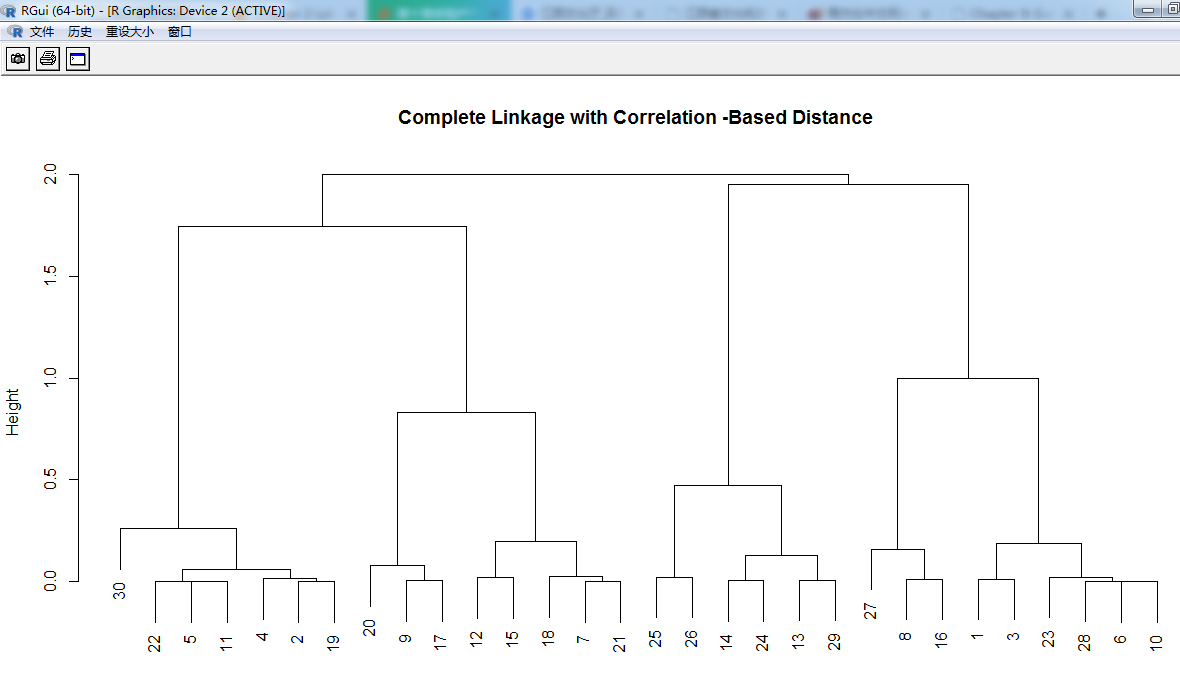

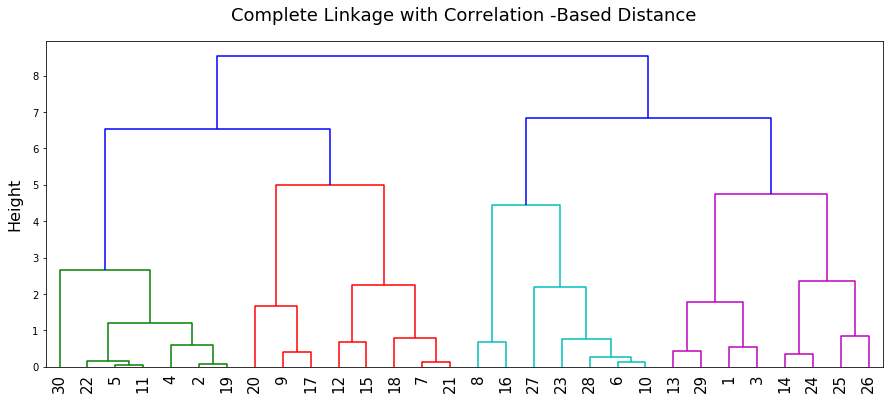

In [51]:
x_r =  pd.read_csv('Data/x_r.csv').set_index('Unnamed: 0')
dd_r = np.corrcoef(x_r)
plt.figure(figsize=(15, 6))
plt.title("Complete Linkage with Correlation -Based Distance", size=18,pad = 20)
plt.ylabel('Height',fontsize = 16,labelpad=10)
hierarchy.dendrogram(hierarchy.complete(dd_r), leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
    labels = x_r.index
)
plt.show()

# 10.6 Lab 3: NCI60 Data Example

> library(ISLR)

> nci.labs=NCI60$labs

> nci.data=NCI60$data

In [52]:
nci_data = pd.read_csv('Data/NCI60_data.csv', index_col=0)
nci_labs= pd.read_csv('Data/NCI60_labs.csv').drop('Unnamed: 0',axis = 1)
#nci_labs.index = nci_data.index
nci_data.index = nci_labs['x']

> dim(nci.data)

In [53]:
nci_data.shape

(64, 6830)

> nci.labs[1:4]

In [54]:
nci_labs[0:4]

,x
0,CNS
1,CNS
2,CNS
3,RENAL


> table(nci.labs)

In [55]:
nci_labs['x'].value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562A-repro    1
MCF7A-repro    1
UNKNOWN        1
K562B-repro    1
MCF7D-repro    1
Name: x, dtype: int64

**10.6.1 PCA on the NCI60 Data**

> pr.out=prcomp(nci.data, scale=TRUE)

In [56]:
X_Standard = scale(nci_data)
pca = PCA()
pca.fit(X_Standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

> Cols=function (vec){
 cols=rainbow(length(unique(vec)))
 return(cols[as.numeric(as.factor(vec))])
 }

In [57]:
color_idx = pd.factorize(nci_data.index)[0]
cmap = plt.cm.hsv

> par(mfrow=c(1,2))

> plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19,
xlab="Z1",ylab="Z2")

> plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19,
xlab="Z1",ylab="Z3")

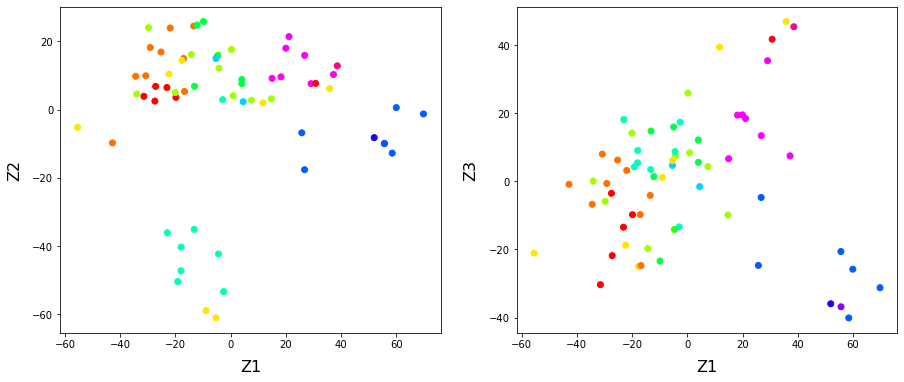

In [58]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.scatter(pca.transform(X_Standard)[:,0],- pca.transform(X_Standard)[:,1], c=color_idx, cmap=cmap)
plt.xlabel('Z1',fontsize = 16,labelpad = 10)
plt.ylabel('Z2',fontsize = 16,labelpad = 10)
plt.subplot(1,2,2)
plt.scatter(pca.transform(X_Standard)[:,0], pca.transform(X_Standard)[:,2], c=color_idx, cmap=cmap)
plt.xlabel('Z1',fontsize = 16,labelpad = 10)
plt.ylabel('Z3',fontsize = 16,labelpad = 10)
plt.show()

> summary(pr.out)

In [59]:
pd.DataFrame([pca.transform(X_Standard)[:,:5].std(axis=0),
              pca.explained_variance_ratio_[:5],
              np.cumsum(pca.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


> plot(pr.out)

Text(0, 0.5, 'Variances')

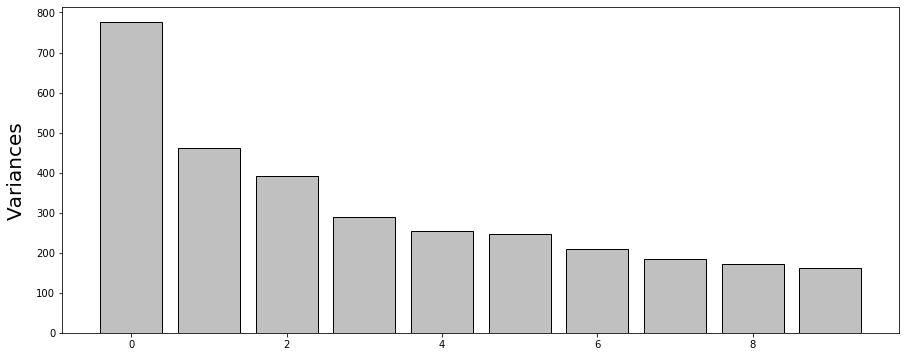

In [60]:
plt.figure(figsize=(15, 6))
plt.bar(np.arange(10),pca.transform(X_Standard)[:,:10].var(axis=0),color = 'silver',edgecolor = 'black')
plt.ylabel('Variances',fontsize = 20 ,labelpad = 10)

> pve=100*pr.out$sdev ^2/sum(pr.out$sdev ^2)
> par(mfrow=c(1,2))
> plot(pve, type="o", ylab="PVE", xlab="Principal Component ",
col="blue")
> plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="
Principal Component ", col="brown3")

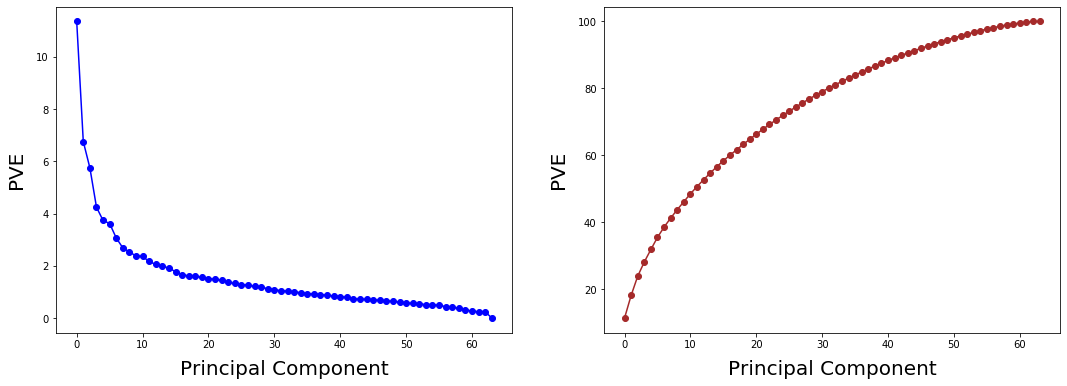

In [61]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.plot(pca.explained_variance_ratio_ * 100, 'bo-')
plt.xlabel("Principal Component",fontsize = 20 ,labelpad = 10)
plt.ylabel("PVE",fontsize = 20 ,labelpad = 10)
plt.subplot(1,2,2)
plt.plot(pca.explained_variance_ratio_.cumsum()*100, 'o-',color = 'brown')
plt.xlabel("Principal Component",fontsize = 20 ,labelpad = 10)
plt.ylabel("PVE",fontsize = 20 ,labelpad = 10)
plt.show()

# 10.6.2 Clustering the Observations of the NCI60 Data

> sd.data=scale(nci.data)

> par(mfrow=c(1,3))

> data.dist=dist(sd.data)

> plot(hclust(data.dist), labels=nci.labs, main="Complete
Linkage", xlab="", sub="",ylab="")

> plot(hclust(data.dist , method="average "), labels=nci.labs,
main="Average Linkage", xlab="", sub="",ylab="")

> plot(hclust(data.dist , method="single"), labels=nci.labs ,
main="Single Linkage", xlab="", sub="",ylab="")

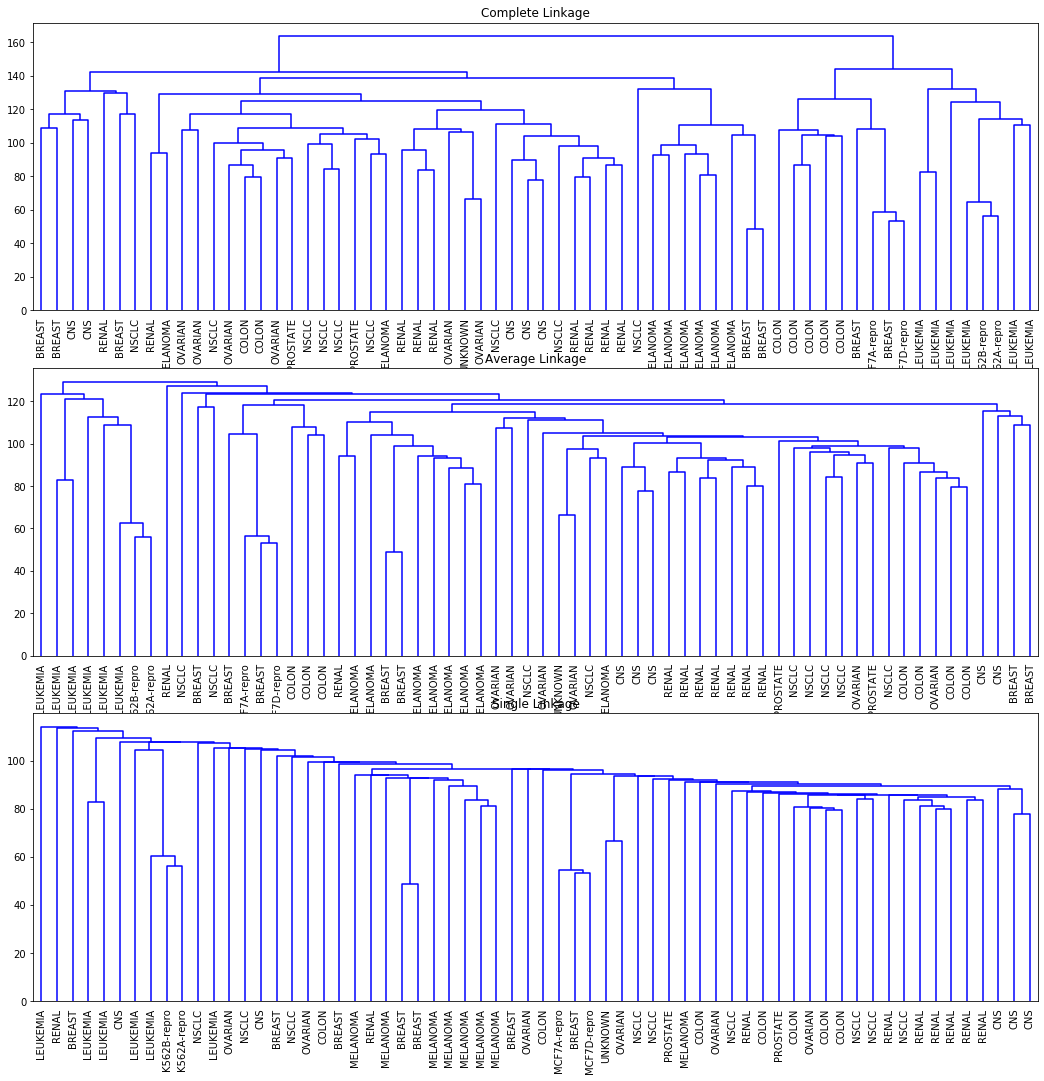

In [62]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(18,18))

for linkage, cluster, ax in zip([hierarchy.complete(X_Standard), hierarchy.average(X_Standard), hierarchy.single(X_Standard)], 
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, labels = nci_data.index,
                                   color_threshold=0,leaf_rotation=90.,leaf_font_size=10.)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

> hc.out=hclust(dist(sd.data))

> hc.clusters =cutree(hc.out ,4)

> table(hc.clusters ,nci.labs)

In [63]:
clusters_pd = pd.DataFrame(hierarchy.cut_tree(hierarchy.complete(X_Standard) , 4),index = nci_data.index,columns = ['hc_clusters']) 
pd.crosstab(clusters_pd.hc_clusters,clusters_pd.index)

col_0,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,MCF7A-repro,MCF7D-repro,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
hc_clusters,,,,,,,,,,,,,,
0,2,3,2,0,0,0,0,0,8,8,6,2,8,1
1,3,2,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,1,1,6,0,0,0,0,0,0,0,0
3,2,0,5,0,0,0,1,1,0,0,0,0,0,0


> par(mfrow=c(1,1))

> plot(hc.out, labels=nci.labs)

> abline(h=139, col="red")

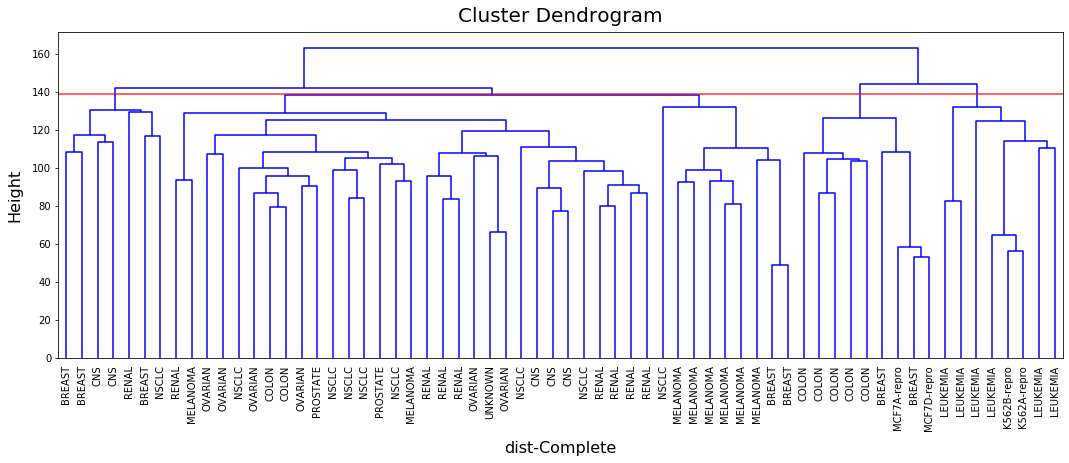

In [64]:
plt.figure(figsize=(18, 6))
hierarchy.dendrogram(hierarchy.complete(X_Standard),labels = nci_data.index,color_threshold=0,leaf_rotation=90.,leaf_font_size=10.)
plt.axhline(139,c = 'red',alpha = 0.8)
plt.title('Cluster Dendrogram',fontsize = 20,pad=10)
plt.xlabel('dist-Complete',fontsize = 16,labelpad=10)
plt.ylabel('Height',fontsize = 16,labelpad=10)
plt.show()

> set.seed(2)

> km.out=kmeans(sd.data , 4, nstart =20)

> km.clusters =km.out$cluster

> table(km.clusters ,hc.clusters )



In [65]:
km_out = KMeans(n_clusters=4, n_init=20, random_state=2)
km_out.fit(X_Standard)
clusters_pd['km_clusters']= km_out.labels_
pd.crosstab(clusters_pd.km_clusters,clusters_pd.hc_clusters)

hc_clusters,0,1,2,3
km_clusters,,,,
0,0,0,7,0
1,16,7,0,0
2,9,0,1,0
3,15,0,0,9


> hc.out=hclust(dist(pr.out$x[,1:5]))

> plot(hc.out, labels=nci.labs, main="Hier. Clust. on First
Five Score Vectors ")


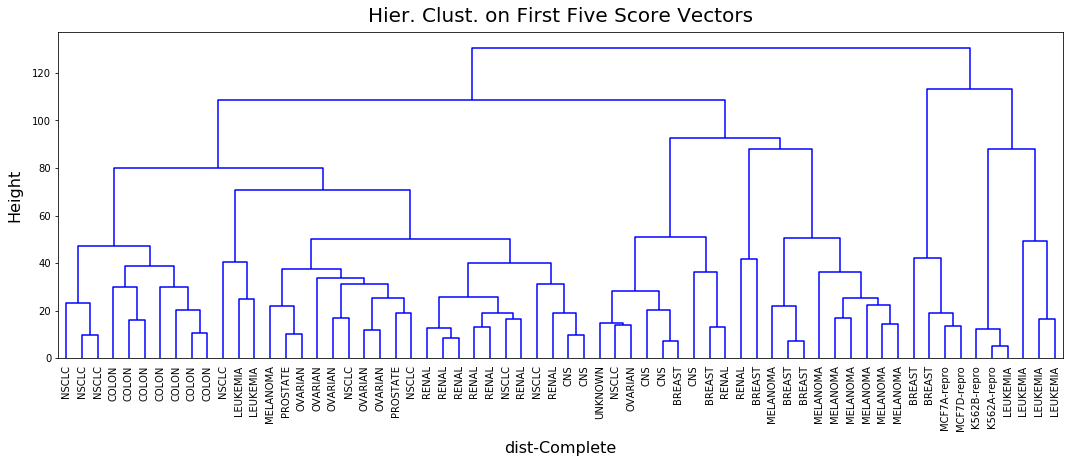

In [66]:
plt.figure(figsize=(18, 6))
hierarchy.dendrogram(hierarchy.complete(pca.transform(X_Standard)[:,:5]),
                     labels = nci_data.index,color_threshold=0,leaf_rotation=90.,leaf_font_size=10.)
plt.axhline(139,c = 'red',alpha = 0.8)
plt.title('Hier. Clust. on First Five Score Vectors',fontsize = 20,pad=10)
plt.xlabel('dist-Complete',fontsize = 16,labelpad=10)
plt.ylabel('Height',fontsize = 16,labelpad=10)
plt.show()

> table(cutree(hc.out ,4), nci.labs)

In [67]:
clusters_pd['hc_clusters_pca'] = hierarchy.cut_tree(hierarchy.complete(pca.transform(X_Standard)[:,:5]) , 4)
pd.crosstab(clusters_pd.hc_clusters_pca,clusters_pd.index)

col_0,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,MCF7A-repro,MCF7D-repro,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
hc_clusters_pca,,,,,,,,,,,,,,
0,0,2,7,0,0,2,0,0,1,8,5,2,7,0
1,5,3,0,0,0,0,0,0,7,1,1,0,2,1
2,0,0,0,1,1,4,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,1,1,0,0,0,0,0,0
